In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
class Bandit:
    def __init__(self, arms=10):
        self.rates = np.random.rand(arms)
        
    def play(self, arm):
        rate = self.rates[arm]
        if rate > np.random.rand():
            return 1
        else:
            return 0
        

In [3]:
class Agent:
    def __init__(self, epsilon, action_size=10):
        self.epsilon = epsilon
        self.Qs = np.zeros(action_size)
        self.ns = np.zeros(action_size)
    
    def update(self, action, reward):
        self.ns[action] += 1
        self.Qs[action] += (reward - self.Qs[action]) / self.ns[action]
        
    def get_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(0, len(self.Qs))
        else:
            return np.argmax(self.Qs)
        

921


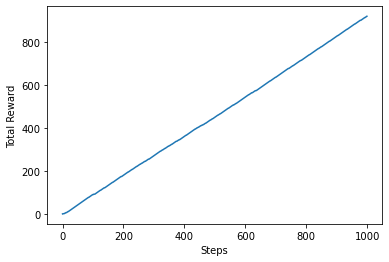

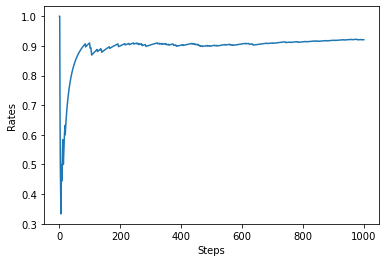

In [5]:
steps = 1000
epsilon = 0.1

bandit = Bandit()
agent = Agent(epsilon)
total_reward = 0
total_rewards = []
rates = []

for step in range(steps):
    action = agent.get_action()
    reward = bandit.play(action)
    agent.update(action, reward)
    total_reward += reward
    total_rewards.append(total_reward)
    rates.append(total_reward / (step + 1))
    
print(total_reward)

plt.ylabel("Total Reward")
plt.xlabel("Steps")
plt.plot(total_rewards)
plt.show()

plt.ylabel("Rates")
plt.xlabel("Steps")
plt.plot(rates)
plt.show()


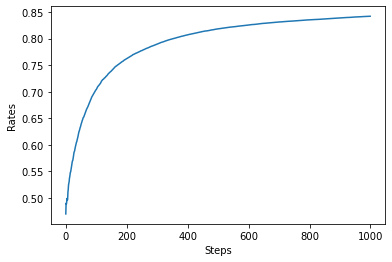

In [6]:
runs = 200
steps = 1000
epsilon = 0.1
all_rates = np.zeros((runs, steps))

for run in range(runs):
    bandit = Bandit()
    agent = Agent(epsilon)
    total_reward = 0
    total_rewards = []
    rates = []    
    for step in range(steps):
        action = agent.get_action()
        reward = bandit.play(action)
        agent.update(action, reward)
        total_reward += reward
        total_rewards.append(total_reward)
        rates.append(total_reward / (step + 1))
    all_rates[run] = rates

avg_rates = np.average(all_rates, axis=0)

plt.ylabel("Rates")
plt.xlabel("Steps")
plt.plot(avg_rates)
plt.show()

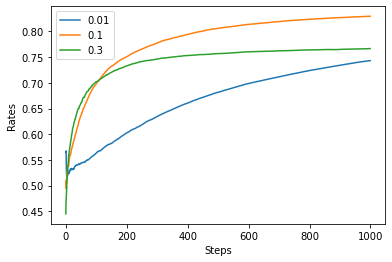

In [9]:
epsilons = [0.01, 0.1, 0.3]

for epsilon in epsilons:

    runs = 200
    steps = 1000
    all_rates = np.zeros((runs, steps))

    for run in range(runs):
        bandit = Bandit()
        agent = Agent(epsilon)
        total_reward = 0
        total_rewards = []
        rates = []    
        for step in range(steps):
            action = agent.get_action()
            reward = bandit.play(action)
            agent.update(action, reward)
            total_reward += reward
            total_rewards.append(total_reward)
            rates.append(total_reward / (step + 1))
        all_rates[run] = rates

    avg_rates = np.average(all_rates, axis=0)

    plt.plot(avg_rates)
plt.ylabel("Rates")
plt.xlabel("Steps")
plt.legend(epsilons)
plt.show()

In [10]:
class NonStatBandit:
    def __init__(self, arms=10):
        self.arms = arms
        self.rates = np.random.rand(arms)
        
    def play(self, arm):
        rate = self.rates[arm]
        self.rates += 0.1 * np.random.randn(self.arms)
        if rate > np.random.rand():
            return 1
        else:
            return 0
        
class AlphaAgent:
    def __init__(self, epsilon, alpha, action_size=10):
        self.epsilon = epsilon
        self.alpha = alpha
        self.Qs = np.zeros(action_size)
    
    def update(self, action, reward):
        self.Qs[action] += (reward - self.Qs[action]) * self.alpha
        
    def get_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(0, len(self.Qs))
        else:
            return np.argmax(self.Qs)

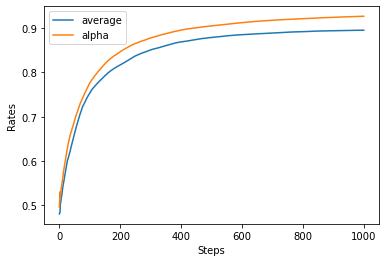

In [15]:
runs = 200
steps = 1000
epsilon = 0.1
alpha = 0.8
all_rates = np.zeros((runs, steps))

for run in range(runs):
    bandit = NonStatBandit()
    agent = Agent(epsilon)
    total_reward = 0
    total_rewards = []
    rates = []    
    for step in range(steps):
        action = agent.get_action()
        reward = bandit.play(action)
        agent.update(action, reward)
        total_reward += reward
        total_rewards.append(total_reward)
        rates.append(total_reward / (step + 1))
    all_rates[run] = rates
avg_rates = np.average(all_rates, axis=0)
plt.plot(avg_rates)

all_rates = np.zeros((runs, steps))
for run in range(runs):
    bandit = NonStatBandit()
    agent = AlphaAgent(epsilon, alpha)
    total_reward = 0
    total_rewards = []
    rates = []    
    for step in range(steps):
        action = agent.get_action()
        reward = bandit.play(action)
        agent.update(action, reward)
        total_reward += reward
        total_rewards.append(total_reward)
        rates.append(total_reward / (step + 1))
    all_rates[run] = rates
avg_rates = np.average(all_rates, axis=0)
plt.plot(avg_rates)

plt.ylabel("Rates")
plt.xlabel("Steps")
plt.legend(["average", "alpha"])
plt.show()